# Diabetes Prediction 

In [ ]:
#pip install pycaret\
# pip install mlxtend
# pip install tensorflow

# Librerias

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from mlxtend.evaluate import confusion_matrix as CM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import numpy as np

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## PYCARET


In [6]:
from pycaret.classification import setup

# Configura tu entorno de Pycaret
modelo = setup(data = df, target = 'Diabetes_binary')


ValueError: Invalid value for the target parameter. Column Diabetes_binary not found in the data.

In [ ]:
from pycaret.classification import compare_models

# Compara modelos
mejor_modelo = compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:29:27
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8666,0.8301,0.1684,0.5730,0.2602,0.2103,0.2587,18.6960
ada,Ada Boost Classifier,0.8652,0.8267,0.1905,0.5471,0.2825,0.2269,0.2658,4.5080
lr,Logistic Regression,0.8640,0.8225,0.1606,0.5401,0.2475,0.1962,0.2406,6.7860
ridge,Ridge Classifier,0.8628,0.8196,0.0408,0.6138,0.0765,0.0602,0.1324,0.4190
lda,Linear Discriminant Analysis,0.8619,0.8196,0.2094,0.5108,0.2970,0.2350,0.2640,0.4180
svm,SVM - Linear Kernel,0.8602,0.8020,0.0786,0.4679,0.1191,0.0913,0.1241,3.6020
rf,Random Forest Classifier,0.8599,0.7994,0.1714,0.4923,0.2542,0.1964,0.2301,21.9160
knn,K Neighbors Classifier,0.8481,0.7139,0.1934,0.4052,0.2618,0.1888,0.2050,28.6390
dt,Decision Tree Classifier,0.7970,0.5986,0.3248,0.2936,0.3084,0.1898,0.1902,0.9610
nb,Naive Bayes,0.7742,0.7842,0.5720,0.3242,0.4138,0.2870,0.3048,0.3390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8668,0.8303,0.1624,0.5779,0.2535,0.2049,0.2556,11.0010
gbc,Gradient Boosting Classifier,0.8666,0.8301,0.1684,0.5730,0.2602,0.2103,0.2587,18.6960
xgboost,Extreme Gradient Boosting,0.8654,0.8257,0.1759,0.5535,0.2669,0.2141,0.2574,2.6670
ada,Ada Boost Classifier,0.8652,0.8267,0.1905,0.5471,0.2825,0.2269,0.2658,4.5080
lr,Logistic Regression,0.8640,0.8225,0.1606,0.5401,0.2475,0.1962,0.2406,6.7860
ridge,Ridge Classifier,0.8628,0.8196,0.0408,0.6138,0.0765,0.0602,0.1324,0.4190
lda,Linear Discriminant Analysis,0.8619,0.8196,0.2094,0.5108,0.2970,0.2350,0.2640,0.4180
dummy,Dummy Classifier,0.8607,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2370
svm,SVM - Linear Kernel,0.8602,0.8020,0.0786,0.4679,0.1191,0.0913,0.1241,3.6020
rf,Random Forest Classifier,0.8599,0.7994,0.1714,0.4923,0.2542,0.1964,0.2301,21.9160


## Analysis

In [7]:
df.drop_duplicates(inplace = True)
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

In [8]:
df = df.drop(['CholCheck','AnyHealthcare','NoDocbcCost','Fruits', 'Veggies', 'Education', 'HvyAlcoholConsump', 'Sex', 'Income', 'DiffWalk'], axis=1)

In [9]:
df

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,5.0,18.0,15.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,11.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0


<Axes: title={'center': 'Pearson'}>

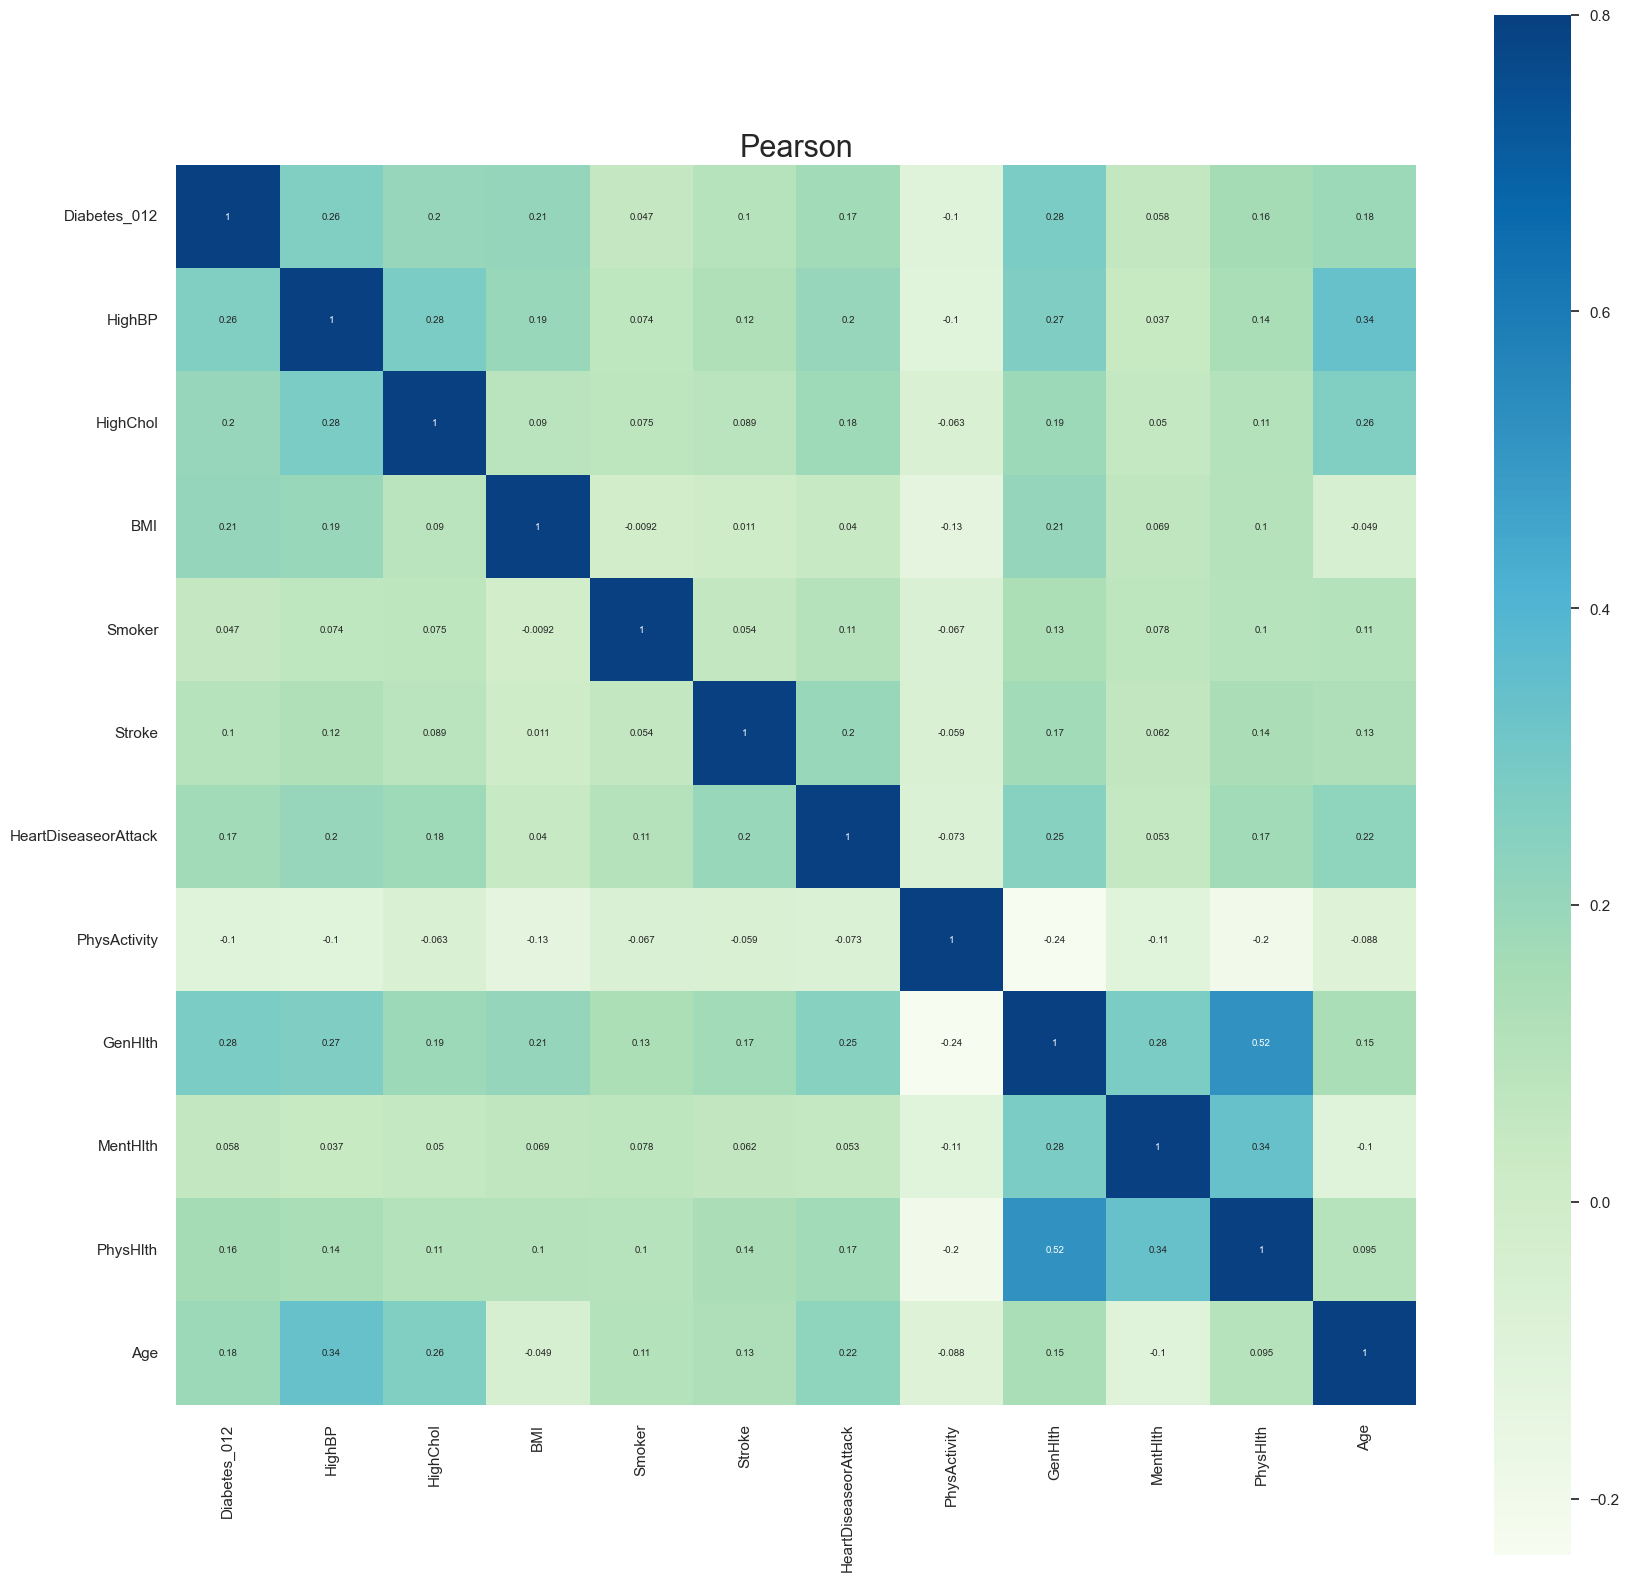

In [10]:
#CORRELACION PEARSON
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(20,20))
plt.title("Pearson", fontsize=22)
sns.heatmap(df.corr(),vmax=0.8,square=True,cmap="GnBu",linecolor='r',annot=True,annot_kws={'size':7})

In [11]:
#Redistribucion de data entre clases
df = df[df['Diabetes_012'] != 1.0]
df.loc[df['Diabetes_012'] == 2.0, 'Diabetes_012'] = 1.0

df_NO_Diabetes = df[df['Diabetes_012'] == 0.0]
df_SI_Diabetes = df[df['Diabetes_012'] == 1.0]

df_NO_Diabetes = df_NO_Diabetes.sample(frac=0.20, random_state=100)
df = pd.concat([df_NO_Diabetes, df_SI_Diabetes])

In [12]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    38011
1.0    35097
Name: count, dtype: int64

array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>],
       [<Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

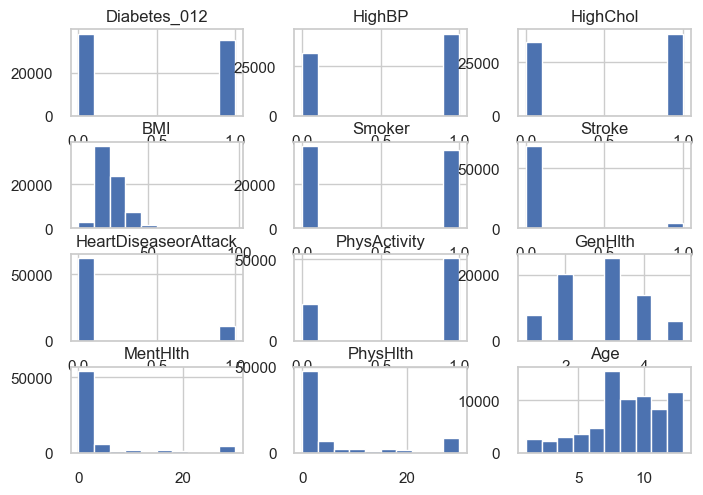

In [13]:
df.hist()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73108 entries, 159046 to 253679
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          73108 non-null  float64
 1   HighBP                73108 non-null  float64
 2   HighChol              73108 non-null  float64
 3   BMI                   73108 non-null  float64
 4   Smoker                73108 non-null  float64
 5   Stroke                73108 non-null  float64
 6   HeartDiseaseorAttack  73108 non-null  float64
 7   PhysActivity          73108 non-null  float64
 8   GenHlth               73108 non-null  float64
 9   MentHlth              73108 non-null  float64
 10  PhysHlth              73108 non-null  float64
 11  Age                   73108 non-null  float64
dtypes: float64(12)
memory usage: 7.3 MB


In [15]:
#COPIAS DE DF
df_SVM = df
df_ANN = df

In [ ]:
scaler = MinMaxScaler()

# **SVM:**

In [30]:
x_SVM = df_SVM.drop(df_SVM.columns[0], axis=1)

In [ ]:
x_SVM = scaler.fit(x_SVM).transform(x_SVM)
y_SVM = df_SVM[df.columns[0]]

In [ ]:
x_train_SVM, x_test_SVM, y_train_SVM, y_test_SVM = train_test_split(x_SVM, y_SVM, test_size=0.30, random_state=50)

In [ ]:
#ENTRENAMIENTO DEL MODELO
#svm_model = SVC()
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_SVM, y_train_SVM)

SVC(kernel='linear')

In [ ]:
# Predicciones SVM
y_pred_svm_train = svm_model.predict(x_train_SVM)
y_pred_svm_test = svm_model.predict(x_test_SVM)

In [ ]:
# Evaluacion SVM TRAIN
accuracy_svm = accuracy_score(y_train_SVM, y_pred_svm_train)
print("Métricas para el modelo SVM:")
print(classification_report(y_train_SVM, y_pred_svm_train))
print(accuracy_svm)

Métricas para el modelo SVM:
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73     26526
         1.0       0.71      0.76      0.73     24649

    accuracy                           0.73     51175
   macro avg       0.73      0.73      0.73     51175
weighted avg       0.73      0.73      0.73     51175

0.7321934538348803


In [ ]:
# Evaluacion SVM TEST
accuracy_svm = accuracy_score(y_test_SVM, y_pred_svm_test)
print("Métricas para el modelo SVM:")
print(classification_report(y_test_SVM, y_pred_svm_test))
print(accuracy_svm)

Métricas para el modelo SVM:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73     11485
         1.0       0.69      0.76      0.72     10448

    accuracy                           0.72     21933
   macro avg       0.73      0.73      0.72     21933
weighted avg       0.73      0.72      0.72     21933

0.7242055350385265


In [ ]:
confusion_matrix(y_test_SVM, y_pred_svm_test)

array([[7980, 3505],
       [2544, 7904]])

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as archivo:
    pickle.dump(svm_model, archivo)

In [ ]:
with open('model.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

In [27]:
fila_aleatoria = df.sample(n=1)
fila_aleatoria

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,Age
213242,1.0,1.0,1.0,42.0,1.0,0.0,1.0,0.0,5.0,1.0,20.0,10.0


In [31]:
X_test = fila_aleatoria.drop('Diabetes_012', axis=1)  # Si 'target' es tu columna objetivo, elimínala de las características
h1 = scaler.transform(X_test.values.reshape(-1, 11))

In [ ]:
prediccion = svm_model.predict(h1)
prediccion

array([1.])

# **ANN:**

In [16]:
x_ANN = df_ANN.drop(df_ANN.columns[0], axis=1)
x_ANN = MinMaxScaler().fit(x_ANN).transform(x_ANN)
y_ANN = df_ANN[df.columns[0]]

In [17]:
x_train_ANN, x_test_ANN, y_train_ANN, y_test_ANN = train_test_split(x_ANN, y_ANN, test_size=0.30, random_state=50)

In [18]:
y_train_ANN = pd.get_dummies(y_train_ANN)
y_test_ANN = pd.get_dummies(y_test_ANN)

In [19]:
#CONSTRUCCIÓN DE LA RED
ann = Sequential()
ann.add(Dense(11, activation='relu'))
ann.add(Dense(6, activation='relu'))
ann.add(Dense(4, activation='relu'))
ann.add(Dense(2, activation='sigmoid'))
ann.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
ann.fit(x=x_train_ANN, y=y_train_ANN ,validation_data=(x_test_ANN,y_test_ANN), batch_size=1000, epochs=60,verbose=1)

Epoch 1/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5198 - loss: 0.7001 - val_accuracy: 0.6086 - val_loss: 0.6653
Epoch 2/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6361 - loss: 0.6564 - val_accuracy: 0.6700 - val_loss: 0.6322
Epoch 3/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.6887 - loss: 0.6185 - val_accuracy: 0.6811 - val_loss: 0.6019
Epoch 4/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6977 - loss: 0.5889 - val_accuracy: 0.6886 - val_loss: 0.5868
Epoch 5/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.7016 - loss: 0.5752 - val_accuracy: 0.6969 - val_loss: 0.5745
Epoch 6/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.7096 - loss: 0.5631 - val_accuracy: 0.7080 - val_loss: 0.5630
Epoch 7/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.7209 - loss: 0.5506 - val_accuracy: 0.7144 - val_loss: 0.5544
Epoch 8/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.7243 - loss: 0.5443 - val_accuracy: 0.7189 -

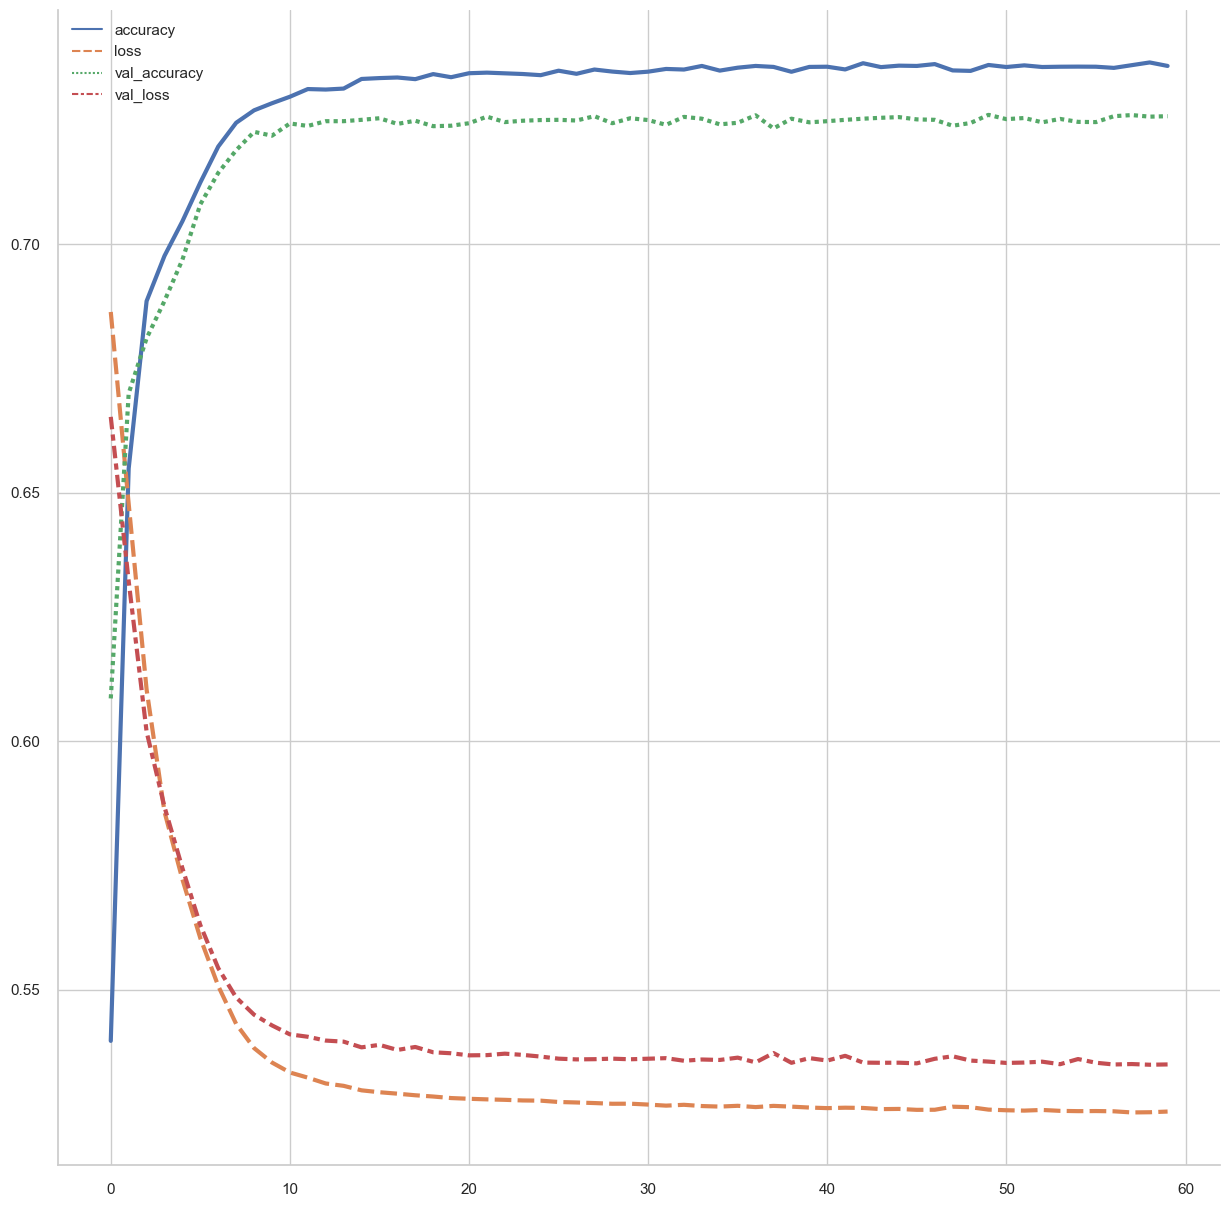

In [20]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,15))
sns.lineplot(data=loss, lw=3)
sns.despine()

In [21]:
y_pred_train_ANN = ann.predict(x_train_ANN)
y_pred_test_ANN = ann.predict(x_test_ANN)

1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 342us/step
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step


In [22]:
for i in range(len(y_pred_train_ANN)):
  index = list(y_pred_train_ANN[i]).index(max(y_pred_train_ANN[i]))
  for j in range(len(y_pred_train_ANN[i])):
    y_pred_train_ANN[i][j] = 0
  y_pred_train_ANN[i][index] = 1

for i in range(len(y_pred_test_ANN)):
  index = list(y_pred_test_ANN[i]).index(max(y_pred_test_ANN[i]))
  for j in range(len(y_pred_test_ANN[i])):
    y_pred_test_ANN[i][j] = 0
  y_pred_test_ANN[i][index] = 1

In [23]:
y_pred_train_ANN

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [24]:
# Evaluacion ANN TRAIN
accuracy_ann = accuracy_score(y_train_ANN, y_pred_train_ANN)
print("Métricas para el modelo SVM:")
print(classification_report(y_train_ANN, y_pred_train_ANN))
print(accuracy_ann)

Métricas para el modelo SVM:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74     26526
           1       0.71      0.76      0.74     24649

   micro avg       0.74      0.74      0.74     51175
   macro avg       0.74      0.74      0.74     51175
weighted avg       0.74      0.74      0.74     51175
 samples avg       0.74      0.74      0.74     51175

0.736629213483146


In [25]:
# Evaluacion ANN TEST
accuracy_ann = accuracy_score(y_test_ANN, y_pred_test_ANN)
print("Métricas para el modelo SVM:")
print(classification_report(y_test_ANN, y_pred_test_ANN))
print(accuracy_ann)

Métricas para el modelo SVM:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73     11485
           1       0.69      0.76      0.72     10448

   micro avg       0.73      0.73      0.73     21933
   macro avg       0.73      0.73      0.73     21933
weighted avg       0.73      0.73      0.73     21933
 samples avg       0.73      0.73      0.73     21933

0.7257557105731091


In [32]:
pred_ann = ann.predict(h1)
pred_ann

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.4919077, 0.9086842]], dtype=float32)

In [ ]:
#confusion_matrix(y_test_ANN, y_pred_test_ANN)

La primera descarga da resultados sobre el 70, entre un rango de la clase 0 de 0.22 a 0.26. Con 22 da los mejores resultados. Incluso se ve que con 55 o 60 epocas podria ser suficiente.

La segunda descarga tiene un buen resultado con 0.25.

La tercera descarga tiene los mejores resultados con 0.20